---
title: Cap18 Validation
execute:
  echo: false
  cache: true
format:
  html:
    html-math-method: katex
    embed-resources: true
    self-contained-math: true
    toc: true
  docx:
    df-print: tibble
  pdf:
    toc: true
    include-in-header:
      text: |
        \usepackage{amssymb}
        \usepackage{xcolor}
        \usepackage{fancyhdr}
        \pagestyle{fancy}
        \fancyhead[L]{Project: Cap18 Validation \\ Task: Larsa Comparison}
        \fancyhead[R]{Calculated by: CAM Date: 10/17/2024 \\Checked by:     Date:   /  /    }
  typst:
    toc: true
---

# Cap18 Program and Validation Summary

Cap18 is a TxDOT specialized structural analysis program using a discrete element model that produces envelopes of maximum bending and shear forces acting on bridge bent caps. HDR uses this software heavily in the bent design process, so validation of this tool is necessary. Since there is no access to the underlying code, validation must be approached differently compared to internal tools. This document will attempt to provide an outline for the process of validating the Cap18 program.

## Cap18 Inputs

This next section will get into the details of what the Cap18 program is. It will try to stay concise. However, there are many inputs to the program, and it is important to list out all of them in order to determine the amount of options available. 

The Cap18 program allows the user to provide a number of different inputs. These inputs are provided to the program through a "\*.dat" file. This input file is simply a text file that the program can parse and then execute. The file has a specific format that is separated by different "cards".  There are 4 different types of cards.
- Comment Cards
- Header Cards
- Problem Cards
- Table Cards
The specific order of these cards allows the program to know the current card as it steps through each line. Each card is a single line in the input file that contains multiple inputs the program can read. The multiple inputs are separated by the position on the line (ie the first input will be a certain range of characters in the beginning of the line). An input does not have to fill the entire range of characters for that specific input. This range allowance for each input will not be checked directly. Although with the different bents, there will be enough disparity among the inputs to that some level of checking will be done indirectly. A summary of the cards and their list of inputs will now be discussed in more detail to determine the brevity of the check that is needed.

### Comment Cards

Comment cards begin with a dollar sign ($) and these lines are for the users own documentation purposes. These cards are ignored by the Cap18 program. No checking is needed here.

### Header Cards

Header cards are sort of comment cards, but the Cap18 program needs them to run. These cards only contain general project information that does not affect the results. The same headers will be provided to each run. No checking is needed here.

### Problem Cards

Problem cards contain 3 inputs.
- Problem number
- Unit Code
- Description
From the problem card inputs, unit code is the only one that will affect results. However only the US Customary unit code will be checked. 

### Table Cards

#### Table 1

Table 1 card contains 9 inputs.
- Print stringer reaction report
- Keep Envelopes from prior problem
- Keep prior Table 2
- Keep prior Table 3
- Keep prior Table 4
- Number of cards for Table 4
- Keep envelopes from random lane
- Print options
- Skew angle

#### Table 2

Table 2 has two cards Table2a and Table 2b.

Table 2a has 9 inputs.
- number of slab increments
- increment length
- number of total moving increments
- start station of moving load
- end station of moving load
- step size of moving increments
- analysis option
- dead load factor
- live load factor

Table 2b has 7 inputs.
- overlay factor
- max lanes loaded
- multiple presence factor for 1 lane
- multiple presence factor for 2 lanes
- multiple presence factor for 3 lanes
- multiple presence factor for 4 lanes
- multiple presence factor for 5 lanes

#### Table 3
Table 3 has a varied number of inputs depending on the problem. However, they can be classified into 11 different inputs
- number of lanes
- number of stringers
- number of supports 
- number of moment points 
- station at left lane
- stations at right lane
- station at stringers
- station at supports
- station at moment points
- station at shear points

#### Table 4
Table 4 has a varied number of inputs, and they can be classified into 8 different inputs.
- station from
- station to
- cont'd
- bending stiffness of cap
- slab and sidewalk loads
- cap and stringer loads
- moving loads
- overlay loads 


To validate Cap18, the program will be run for a number of various bents. These results will then be compared against one of HDRs validated software programs, LARSA. The different bent configurations will be discussed below. At the end, a summary of the different bent configurations and their inputs into the cap18 program will be shown. The goal is for each input into the Cap18 program to at least have 1 different value across all the different configurations. 

## Multi-Column Bents - No Skew

Here are a list of the bent configurations that fall into the above category.
- 24' roadway and bent with 3 columns
- 40' roadway and bent with 3 columns
- 44' roadway and bent with 4 columns (Tx62 girders)

## Multi-Column Bents - With Skew

Here are a list of the bent configurations that fall into the above category.
- 24' roadway and bent with 3 columns 15, 30, 45
- 24' roadway and bent with 3 columns 15, 30, 45
- 44' roadway and bent with 4 columns (Tx62 girders) 15, 30, 45

## Single Column Bents

# Four Column Bent Analysis Comparison

A typical 4-column bent was run and analyzed with both Cap18 and LARSA. Results between the two were fairly close, with Cap18 having more conservative values in the maximum and minimum areas. 

In [2]:
using Revise
using Plots, DataFrames, CSV, Tidier
using Cap18
import StatsPlots as stats

In [3]:
dir = pwd();

In [4]:
gr();

In [5]:
legend_pos = :outertopright
x_size = 721
y_size = 400;

## Cap18 Results

In [6]:
trim(m::Cap18.Moments) = Cap18.Moments(m.dist[2:end-1], m.moments[2:end-1])
trim(m::Cap18.Shears) = Cap18.Shears(m.dist[2:end-1], m.shear[2:end-1])
trim(m::Cap18.MomentEnvelopes) = Cap18.MomentEnvelopes(m.dist[2:end-1], m.max_moment[2:end-1], m.min_moment[2:end-1])
trim(m::Cap18.ShearEnvelopes) = Cap18.ShearEnvelopes(m.dist[2:end-1], m.max_shear[2:end-1], m.min_shear[2:end-1]);

In [7]:
path = pwd() * "/cap18_check.lis"
p = parse_cap18(path);

### Dead Load Results (SRV)

In [8]:
p1_tb4a = DataFrame(p[1].tb4a.results)
d_dc_cap18 = deflections(p[1].tb4a)
m_dc_cap18 = moments(p[1].tb4a) |> trim
s_dc_cap18 = shears(p[1].tb4a) |> trim;

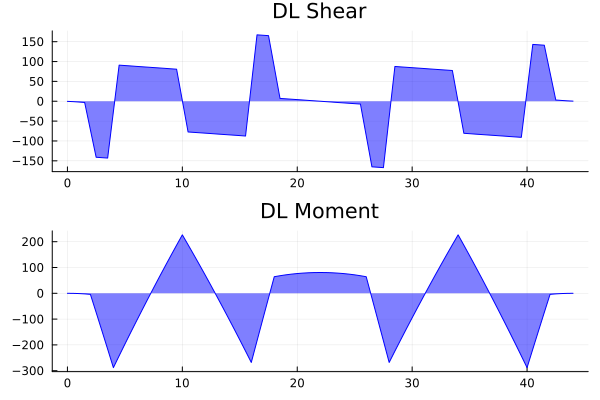

In [9]:
#| fig-cap: "Cap18: DL Shear and Moment Diagrams"
plot(
		# plot(d_dc_cap18, title = "DL Deflections"),
		plot(s_dc_cap18, title = "DL Shear"),
		plot(m_dc_cap18, title = "DL Moment"),
		layout = (2, 1)
	)

### Envelopes of Maximum Values (SRV)

In [10]:
p1_tb6 = DataFrame(p[1].tb6ws.results);
smax_cap18_srv = max_shears(p[1].tb6ws) |> trim
smin_cap18_srv = min_shears(p[1].tb6ws) |> trim
se_cap18_srv = shear_envelopes(p[1].tb6ws) |> trim

mmax_cap18_srv = max_moments(p[1].tb6ws) |> trim
mmin_cap18_srv = min_moments(p[1].tb6ws) |> trim
me_cap18_srv = moment_envelopes(p[1].tb6ws) |> trim;

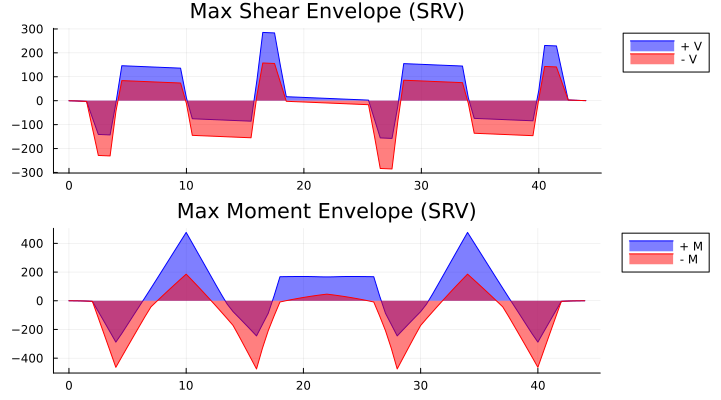

In [11]:
#| fig-cap: "Cap18: Service Shear and Moment Envelope Diagrams"
plot(
		plot(se_cap18_srv, title="Max Shear Envelope (SRV)"),
		plot(me_cap18_srv, title="Max Moment Envelope (SRV)"), 
		layout = (2, 1),
		legend = legend_pos,
		size = (x_size, y_size)
	)

### Maximum Support Reactions (SRV)

In [12]:
#| tbl-cap: "Cap18: Service Reactions"
r_cap18_srv = DataFrame(p[1].tb7ws.results)

Row,sta,dist,max_reaction,min_reaction
,Int64,Float64,Float64,Float64
1,8,4.0,376.5,229.2
2,32,16.0,441.0,245.3
3,56,28.0,441.0,245.3
4,80,40.0,376.5,229.2


### Envelopes of Maximum Values (STR)

In [13]:
p1_tb6lf = DataFrame(p[1].tb6lf.results);

In [14]:
smax_cap18_str = max_shears(p[1].tb6lf) |> trim
smin_cap18_str = min_shears(p[1].tb6lf) |> trim
se_cap18_str = shear_envelopes(p[1].tb6lf) |> trim

mmax_cap18_str = max_moments(p[1].tb6lf) |> trim
mmin_cap18_str = min_moments(p[1].tb6lf) |> trim
me_cap18_str = moment_envelopes(p[1].tb6lf) |> trim;

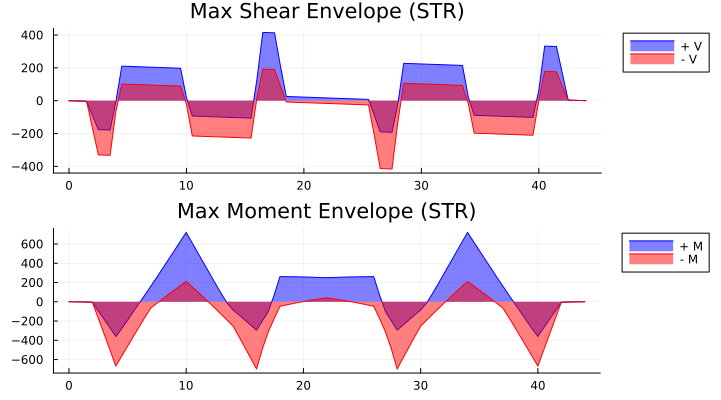

In [15]:
#| fig-cap: "Cap18: Strength Shear and Moment Envelope Diagrams"
plot(
		plot(se_cap18_str, title="Max Shear Envelope (STR)"),
		plot(me_cap18_str, title="Max Moment Envelope (STR)"), 
		layout = (2, 1),
		legend = legend_pos,
		size = (x_size, y_size)
	)

### Maximum Support Reactions (STR)

In [16]:
#| tbl-cap: "Cap18: Strength Reactions"
r_cap18_str = DataFrame(p[1].tb7lf.results)

Row,sta,dist,max_reaction,min_reaction
,Int64,Float64,Float64,Float64
1,8,4.0,540.9,283.0
2,32,16.0,643.3,300.9
3,56,28.0,643.3,300.9


## LARSA Results

In [17]:
function parse_larsa_moments(df)
	@chain df begin
		@clean_names
		@rename(moment_y = `moment_y_(kips_ft)`)
		@filter(member < 20000)
		# @filter(mod(member, 10000) == mod(joint, 1000))
		@mutate(moment_y = if_else(mod(member, 10000) == mod(joint, 1000),moment_y, -moment_y))
		@mutate(joint = (joint-1000)*0.5)
	    @group_by(joint)
	    @summarize(
			max_my = maximum(moment_y),
			min_my = minimum(moment_y)
		)
	    @select(joint, max_my, min_my)
		@ungroup
		Cap18.MomentEnvelopes(_.joint, _.max_my, _.min_my)
	end
end;

In [18]:
function parse_larsa_moments(df, sym)
	new_df = @chain df begin
		@clean_names
		@rename(moment_y = `moment_y_(kips_ft)`)
		@filter(member < 20000)
		# @filter(mod(member, 10000) == mod(joint, 1000))
		@mutate(moment_y = if_else(mod(member, 10000) == mod(joint, 1000),moment_y, -moment_y))
		@mutate(joint = (joint-1000)*0.5)
	    @group_by(joint)
	    @summarize(
			max_my = maximum(moment_y),
			min_my = minimum(moment_y)
		)
	    @select(joint, max_my, min_my)
		@ungroup
	end
	if sym == :maximum
		Cap18.Moments(new_df.joint, new_df.max_my)
	elseif sym == :minimum
		Cap18.Moments(new_df.joint, new_df.min_my)
	else
		error("Please enter `:maximum` or `:minimum` for sym. You entered $sym")
	end
end;

In [19]:
function parse_larsa_shears(df)
	@chain df begin
		@clean_names
		@rename(force_z = `force_z_(kips)`)
		@filter(member < 20000)
		# @filter(mod(member, 10000) == mod(joint, 1000))
		@mutate(force_z = if_else(mod(member, 10000) == mod(joint, 1000),force_z, -force_z))
		@mutate(joint = (joint-1000)*0.5)
	    @group_by(joint)
	    @summarize(
			max_fz = maximum(force_z),
			min_fz = minimum(force_z)
		)
	    @select(joint, max_fz, min_fz)
		@ungroup
		Cap18.ShearEnvelopes(_.joint, _.max_fz, _.min_fz)
	end
end;

In [20]:
function parse_larsa_shears(df, sym)
	new_df = @chain df begin
		@clean_names
		@rename(force_z = `force_z_(kips)`)
		@filter(member < 20000)
		# @filter(mod(member, 10000) == mod(joint, 1000))
		@mutate(force_z = if_else(mod(member, 10000) == mod(joint, 1000),force_z, -force_z))
		@mutate(joint = (joint-1000)*0.5)
	    @group_by(joint)
	    @summarize(
			max_fz = maximum(force_z),
			min_fz = minimum(force_z)
		)
	    @select(joint, max_fz, min_fz)
		@ungroup
	end
	if sym == :maximum
		Cap18.Shears(new_df.joint, new_df.max_fz)
	elseif sym == :minimum
		Cap18.Shears(new_df.joint, new_df.min_fz)
	else
		error("Please enter `:maximum` or `:minimum` for sym. You entered $sym")
	end
end;

In [21]:
function parse_larsa_reactions(path)
	df = dropmissing(CSV.read(path, DataFrame))
	@chain df begin
		@clean_names
		@rename(force_z = `force_z_(kips)`)
		@mutate(sta = (joint-1000))
	    @group_by(sta)
	    @summarize(
			dist = maximum((joint-1000)*0.5),
			max_reaction = maximum(force_z),
			min_reaction = minimum(force_z)
		)
	    @select(sta, dist, max_reaction, min_reaction)
		@ungroup
	end
end;

In [22]:
path_dc_larsa_srv = dir *"/dc_larsa_srv.csv";
path_se_larsa_srv = dir *"/se_larsa_srv.csv";
path_me_larsa_srv = dir *"/me_larsa_srv.csv";
path_se_larsa_str = dir *"/se_larsa_str.csv";
path_me_larsa_str = dir *"/me_larsa_str.csv";
path_r_larsa_srv = dir *"/r_larsa_srv.csv";
path_r_larsa_str = dir *"/r_larsa_str.csv";

### Dead Load Results

In [23]:
df_dc_larsa_srv = dropmissing(CSV.read(path_dc_larsa_srv, DataFrame));
m_dc_larsa = parse_larsa_moments(df_dc_larsa_srv, :maximum)
s_dc_larsa = parse_larsa_shears(df_dc_larsa_srv, :maximum);

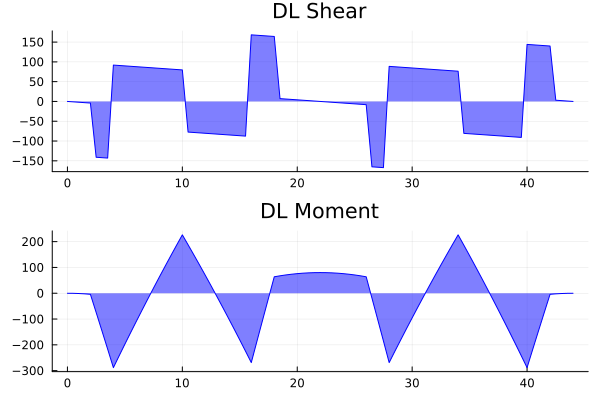

In [24]:
#| fig-cap: "LARSA: DL Shear and Moment Diagrams"
plot(
		# plot(d_dc_cap18, title = "DL Deflections"),
		plot(s_dc_larsa, title = "DL Shear"),
		plot(m_dc_larsa, title = "DL Moment"),
		layout = (2, 1)
	)

### Envelopes of Maximum Values (SRV)

In [25]:
df_se_larsa_srv = dropmissing(CSV.read(path_se_larsa_srv, DataFrame))
df_me_larsa_srv = dropmissing(CSV.read(path_me_larsa_srv, DataFrame));

In [26]:
#shears
smax_larsa_srv = parse_larsa_shears(df_se_larsa_srv, :maximum)
smin_larsa_srv = parse_larsa_shears(df_se_larsa_srv, :minimum)
se_larsa_srv = parse_larsa_shears(df_se_larsa_srv)

# moments
mmax_larsa_srv = parse_larsa_moments(df_me_larsa_srv, :maximum)
mmin_larsa_srv = parse_larsa_moments(df_me_larsa_srv, :minimum)
me_larsa_srv = parse_larsa_moments(df_me_larsa_srv);

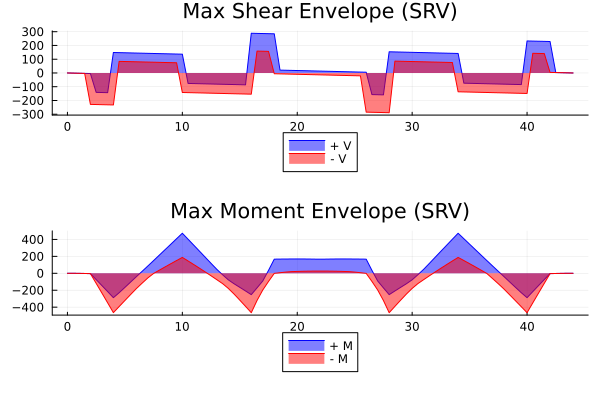

In [27]:
#| fig-cap: "LARSA: Service Shear and Moment Envelope Diagrams"
plot(
		plot(se_larsa_srv, title="Max Shear Envelope (SRV)"),
		plot(me_larsa_srv, title="Max Moment Envelope (SRV)"), 
		layout = (2, 1),
		legend = :outerbottom,
	)

### Maximum Support Reactions (SRV)

In [28]:
#| tbl-cap: Service Reactions
r_larsa_srv = parse_larsa_reactions(path_r_larsa_srv)

Row,sta,dist,max_reaction,min_reaction
,Int64,Float64,Float64,Float64
1,8,4.0,376.619,229.487
2,32,16.0,439.42,247.414
3,56,28.0,439.42,247.414
4,80,40.0,376.577,229.49


### Envelopes of Maximum Values (STR)

In [29]:
df_se_larsa_str = dropmissing(CSV.read(path_se_larsa_str, DataFrame))
df_me_larsa_str = dropmissing(CSV.read(path_me_larsa_str, DataFrame));

In [30]:
#shears
smax_larsa_str = parse_larsa_shears(df_se_larsa_str, :maximum)
smin_larsa_str = parse_larsa_shears(df_se_larsa_str, :minimum)
se_larsa_str = parse_larsa_shears(df_se_larsa_str)

# moments
mmax_larsa_str = parse_larsa_moments(df_me_larsa_str, :maximum)
mmin_larsa_str = parse_larsa_moments(df_me_larsa_str, :minimum)
me_larsa_str = parse_larsa_moments(df_me_larsa_str);

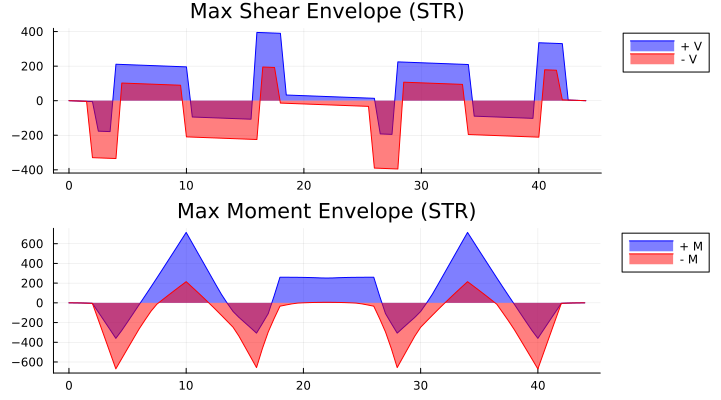

In [31]:
#| fig-cap: "LARSA: Strength Shear and Moment Envelope Diagrams"
plot(
		plot(se_larsa_str, title="Max Shear Envelope (STR)"),
		plot(me_larsa_str, title="Max Moment Envelope (STR)"), 
		layout = (2, 1),
			legend = legend_pos,
		size = (x_size, y_size)
	)

### Maximum Support Reactions (STR)

In [32]:
#| tbl-cap: "LARSA: Strength Reactions"
r_larsa_str = parse_larsa_reactions(path_r_larsa_str)

Row,sta,dist,max_reaction,min_reaction
,Int64,Float64,Float64,Float64
1,8,4.0,541.086,283.606
2,32,16.0,604.078,304.531
3,56,28.0,604.078,304.531
4,80,40.0,541.013,283.611


## Comparison

In [33]:
function plot_shear_comparison(s_cap18, s_larsa; title="Shear Comparison", fillalpha=0.5)
	shear_plt = plot(s_cap18, label="S cap18", fillalpha=fillalpha)
		plot!(s_larsa, fillcolor=:darkorange, lc=:darkorange, label="S larsa", fillalpha=fillalpha)
		plot!(s_cap18 - s_larsa, 
			fillalpha=1, fillcolor=:red, lc=:black, label="S diff",
			title = title
		)
	shear_plt
end;

In [34]:
function plot_moment_comparison(m_cap18, m_larsa; title="Moment Comparison", fillalpha=0.5)
	moment_plt = plot(m_cap18, title = "DL Shear", label="M cap18", fillalpha=fillalpha)
		plot!(m_larsa, fillcolor=:darkorange, lc=:darkorange, label="M larsa", fillalpha=fillalpha)
		plot!(m_cap18 - m_larsa, 
			fillalpha=1, fillcolor=:red, lc=:black, label="M diff",
			title = title
		)
	moment_plt
end;

In [35]:
function plot_comparison(s_cap18, s_larsa, m_cap18, m_larsa; 
    legend_pos=legend_pos,
    size = (x_size, y_size), 
    shear_title="Shear Comparison", 
    moment_title="Moment Comparison",
    shear_alpha=0.5,
    moment_alpha=0.5,
    )
        
        shear_plt = plot_shear_comparison(s_cap18, s_larsa, title=shear_title, fillalpha=shear_alpha)
        
        moment_plt = plot_moment_comparison(m_cap18, m_larsa, title=moment_title, fillalpha=moment_alpha)
            
            plot(
                shear_plt,
                moment_plt,
                layout = (2, 1),
                legend = legend_pos,
                size = size,
                plot_size=size
            )
    end;

In [36]:
function plot_env_comparison(se_cap18_srv, se_larsa_srv, me_cap18_srv, me_larsa_srv; legend_pos=legend_pos, size = (x_size, y_size))
	shear_plt = plot(se_cap18_srv, maxlabel="+V cap18", minlabel="-V cap18")
	plot!(se_larsa_srv, lc=:black, maxlabel="+V larsa", minlabel="-V larsa")
	plot!(se_cap18_srv - se_larsa_srv, 
		fillalpha=1, maxcolor=:red, mincolor=:blue, lc=:black,
		maxlabel="+V diff", minlabel="-V diff",
		title="Shear Envelope Comparison"
	)

	moment_plt = plot(me_cap18_srv, maxlabel="+M cap18", minlabel="-M cap18")
	plot!(me_larsa_srv, lc=:black, maxlabel="+M larsa", minlabel="-M larsa")
	plot!(me_cap18_srv - me_larsa_srv, 
		fillalpha=1, maxcolor=:red, mincolor=:blue, lc=:black,
		maxlabel="+M diff", minlabel="-M diff",
		title="Moment Envelope Comparison"
	)
	
	plot(
		shear_plt,
		moment_plt,
		layout = (2, 1), 
		legend = legend_pos,
		size = size,
		plot_size=(600, 400)
	)
end;

In [37]:
function plot_max_comparison(se_cap18_srv, se_larsa_srv, me_cap18_srv, me_larsa_srv; legend_pos=legend_pos, size = (x_size, y_size))
	s_cap18 = max_shears(se_cap18_srv)
	s_larsa = max_shears(se_larsa_srv)

	m_cap18 = max_moments(me_cap18_srv)
	m_larsa = max_moments(me_larsa_srv)
	plot_comparison(s_cap18, s_larsa, m_cap18, m_larsa; legend_pos=legend_pos, size = size)
end;

In [38]:
function plot_min_comparison(se_cap18_srv, se_larsa_srv, me_cap18_srv, me_larsa_srv; legend_pos=legend_pos, size = (x_size, y_size))
	s_cap18 = min_shears(se_cap18_srv)
	s_larsa = min_shears(se_larsa_srv)

	m_cap18 = min_moments(me_cap18_srv)
	m_larsa = min_moments(me_larsa_srv)
	plot_comparison(s_cap18, s_larsa, m_cap18, m_larsa; legend_pos=legend_pos, size = size)
end;

In [39]:
function plot_difference(
	s_cap18, s_larsa, m_cap18, m_larsa;
	shear_title="Shear Difference",
	moment_title="Moment Difference",
)
	shear_plt = plot(s_cap18 - s_larsa, title = shear_title)
	moment_plt = plot(m_cap18 - m_larsa, title = moment_title)

	plot(
			shear_plt,
			moment_plt,
			layout = (2, 1),
			legend = legend_pos,
			size = (x_size, y_size)
		)
end;

### Dead Load Results (SRV)

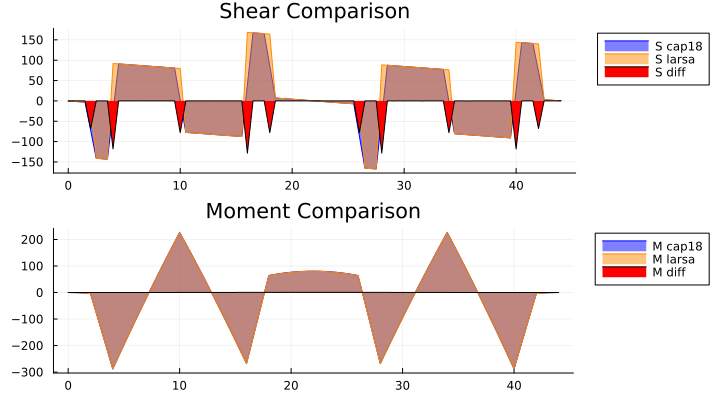

In [40]:
#| fig-cap: "Comparison: DL Shear and Moment Diagrams"
plot_comparison(
	s_dc_cap18, s_dc_larsa, m_dc_cap18, m_dc_larsa; 
	legend_pos=legend_pos, 
	size = (x_size, y_size),
	shear_alpha=0.5,
	moment_alpha=0.5,
)

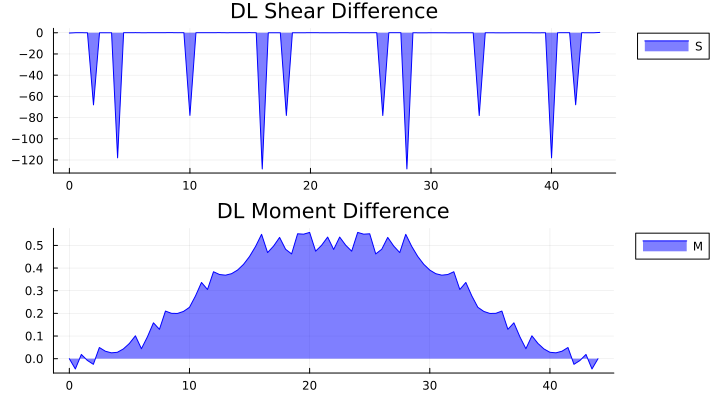

In [41]:
#| fig-cap: "Comparison: DL Shear and Moment Difference"
plot_difference(
	s_dc_cap18, s_dc_larsa, m_dc_cap18, m_dc_larsa,
	shear_title= "DL Shear Difference",
	moment_title= "DL Moment Difference",
)

### Envelopes of Maximum Values (SRV)

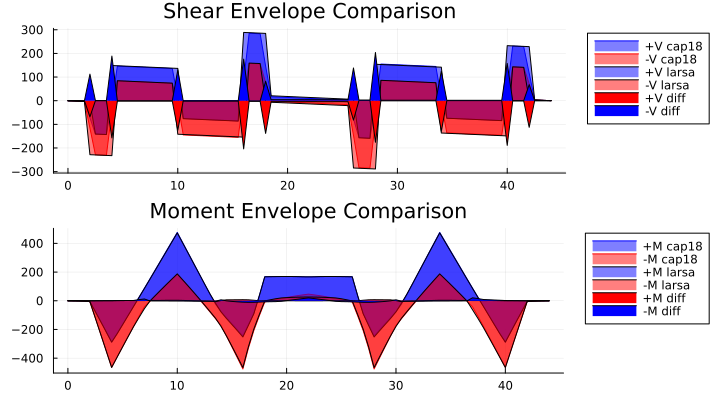

In [42]:
#| fig-cap: "Comparison: Service Shear and Moment Envelope Diagrams"
plot_env_comparison(se_cap18_srv, se_larsa_srv, me_cap18_srv, me_larsa_srv, legend_pos=legend_pos, size=(x_size, y_size))

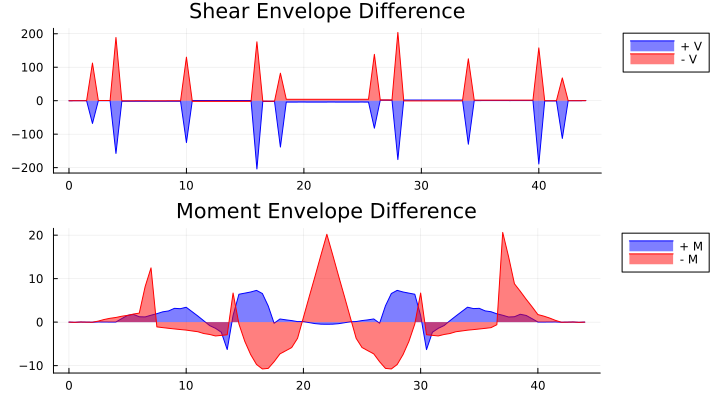

In [43]:
#| fig-cap: "Comparison: Service Shear and Moment Envelope Difference"
plot_difference(
	se_cap18_srv, se_larsa_srv, me_cap18_srv, me_larsa_srv,
	shear_title= "Shear Envelope Difference",
	moment_title= "Moment Envelope Difference",
)

### Maximum Support Reactions (SRV)

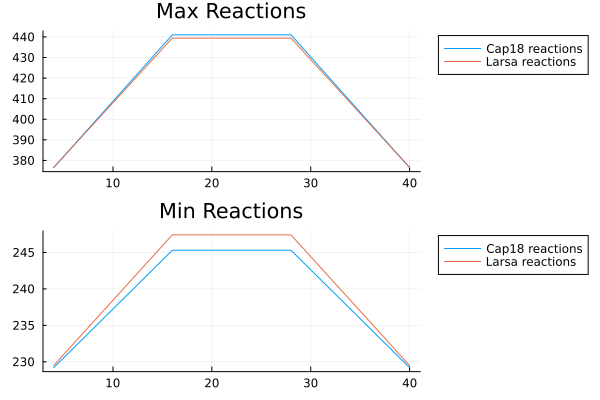

In [44]:
#| fig-cap: "Comparison: Service Reactions"
plt1 = plot(r_cap18_srv.dist, r_cap18_srv.max_reaction, label="Cap18 reactions", title="Max Reactions")
	plot!(r_larsa_srv.dist, r_larsa_srv.max_reaction, label="Larsa reactions")

	plt2 = plot(r_cap18_srv.dist, r_cap18_srv.min_reaction, label="Cap18 reactions", title="Min Reactions")
	plot!(r_larsa_srv.dist, r_larsa_srv.min_reaction, label="Larsa reactions")

	plot(
		plt1, plt2,
		layout = (2, 1),
		legend = legend_pos,
	)

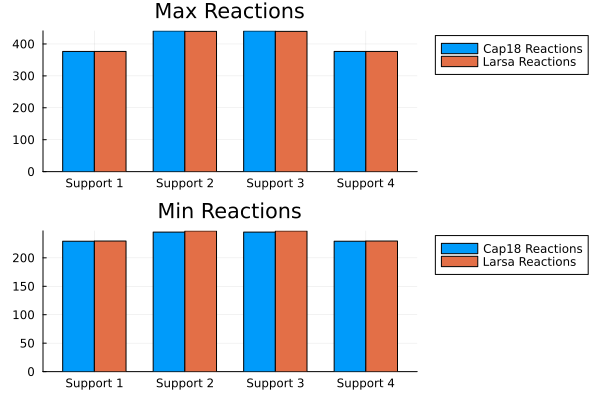

In [45]:
#| fig-cap: "Comparison: Service Reactions"
ctg = repeat(["Cap18 Reactions", "Larsa Reactions"], inner = 4)
	nam = repeat("Support " .* string.(1:4), outer = 2)
	plt1 = stats.groupedbar(nam, hcat(r_cap18_srv.max_reaction, r_larsa_srv.max_reaction), 
		bar_position = :dodge, bar_width=0.7, group=ctg, title = title="Max Reactions",
			)
	plt2 = stats.groupedbar(nam, hcat(r_cap18_srv.min_reaction, r_larsa_srv.min_reaction), 
		bar_position = :dodge, bar_width=0.7, group=ctg, title="Min Reactions",
			)

		plot(plt1, plt2, layout=(2, 1), legend=legend_pos)

### Envelopes of Maximum Values (STR)

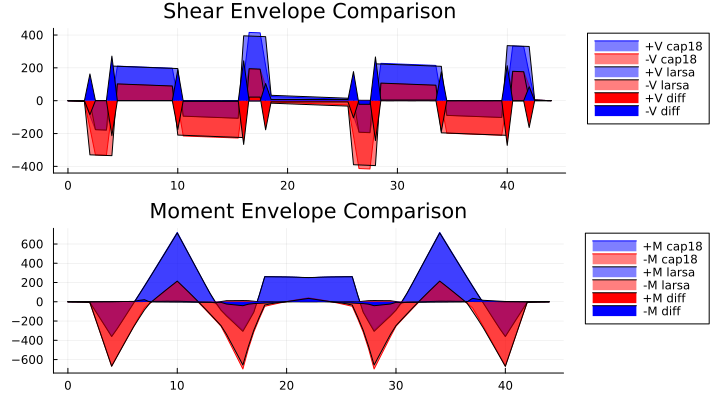

In [46]:
#| fig-cap: "Comparison: Strength Shear and Moment Envelope Diagrams"
plot_env_comparison(se_cap18_str, se_larsa_str, me_cap18_str, me_larsa_str, legend_pos=legend_pos, size=(x_size, y_size))

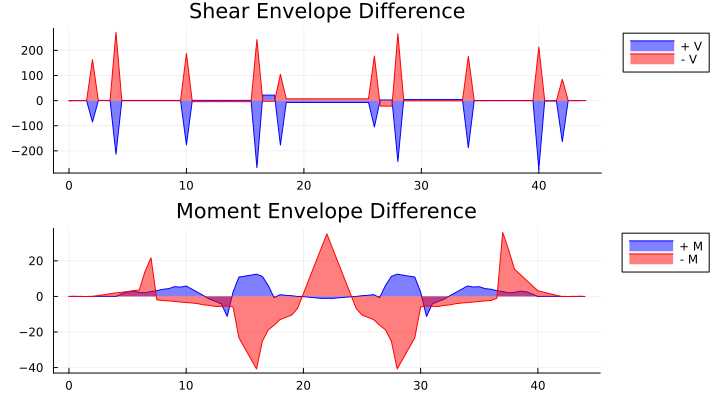

In [47]:
#| fig-cap: "Comparison: Strength Shear and Moment Envelope Difference"
plot_difference(
	se_cap18_str, se_larsa_str, me_cap18_str, me_larsa_str,
	shear_title= "Shear Envelope Difference",
	moment_title= "Moment Envelope Difference",
)